Grupo: Juan Miguel Gutierrez Vidal y Felipe Guzman Sierra

# Taller II: Implementing a simple ASR system using HMM

En este taller implementaremos un sistema de reconocimiento automatico de habla, utilizando modelos ocultos de markov. Para este taller se puede utilizar la libreria [hmmlearn](https://hmmlearn.readthedocs.io/en/latest/tutorial.html#customizing) de Python. Este taller será parte de la nota del proyecto de evaluación del primer corte. Así que se deberá entregar al finalizar la semana 5 junto con el desarrollo del proyecto de evaluación.

En este taller implementaremos un sistema de reconocimiento de habla de palabras aisladas. Esto quiere decir que hay una separación entre cada palabra pronunciada, y no se utilizará  habla fluida continua. La idea es implementar un sistema sencillo con un vocabulario limitado, para qu epuedan entender el principio de funcionamiento de estos sistemas. Para este taller deben seguir lso siguientes pasos:

1. Cree un diccionaro pequeño compuesto de alrededor de 20 palabras. Si desean incluir más palabras no hay problema.
2. Cada una de estas palabras dividalas en fonemas. Asigne a cada fonema un número para facilitar su identificación.
3. Grabé cada una de las palbaras de forma aislada. 
4. Para cada señal de voz grabada calcule el mel espectrograma utilizando 39 componentes (este es el estandar que usan los sistemas modernos).
5. Identifique las secciones del mel spectrograma que corresponden a cada fonema.
6. Modele la distribución de los vectores del Mel espectrograma para cada fonema, esto puede hacerlo usando GMM (Gaussian Mixture Models).
7. Calcule la matrix de probabilidades de transición utilizando el diccionario que ustedes crearón.
8. Implemente el modelo HMM.
9. Pruebe con los datos de entrenamiento si el modelo produce la secuencia de fonemas indicada.
10. Genere un nuevo conjunto de palabras (al menos 10) que se conformen con los fonemas presentes en su diccionario. A partir de la señal de voz de cada una de estas nuevas palabras, trate de predecir la palbara escrita utilizando el modelo implementado.

**NOTA:** Trate de Utilizar fonemas que tengan una única relación con letras (silabas) del alfabeto. Esto disminuirá la tasa de error del modelo.

**Palabras**


    estucado : \e\s\t\u\k\a\d\o
    estucar : \e\s\t\u\k\a\rr\
    estuche : \e\s\t\u\ch\e
    estuco : \e\s\t\u\k\o
    estudiado : \e\s\t\u\\d\i\a\d\o
    estudiantado : \e\s\t\u\d\i\a\n\t\a\d\o
    estudiante : \e\s\t\u\d\i\a\n\t\e
    estudiantes : \e\s\t\u\d\i\a\n\t\e\s
    estudiantil : \e\s\t\u\d\i\a\t\i\l
    estudiantina : \e\s\t\u\d\i\a\n\
    estudiar: \e\s\t\u\d\i\a\rr\
    estudio: \e\s\t\u\d\i\o
    estudios: \e\s\t\u\d\i\o\s
    estudiosamente: \e\s\t\u\d\i\o\s\a\m\e\n\t\e
    estudioso: \e\s\t\u\d\i\o\s\o
    estufa: \e\s\t\u\f\a
    estulticia: \e\s\t\u\l\t\i\c\i\a
    estulto: \e\s\t\u\l\t\o
    estuosidad \e\s\t\u\o\s\i\d\a\d
    estuoso: \e\s\t\u\o\s\o
    estupefacción: \e\s\t\u\p\e\f\a\k\k\i\o\n
    
**fonemas**:7

    \e\:1
    \s\:2
    \t\:3
    \u\:4
    \d\:5
    \i\:6
    \k\:7
    \a\:8
    \d\:9
    \rr\:10
    \ch\:11
    \s\:12
    \l\:13
    \0\:14
    \m\:15
    \n\:16
    \f\17
    
    
**Palabras generadas con los fonemas**

    dia
    tu
    antes
    carro
    dado
    mente
    tina
    si
    carroceria
    faccion
    
    

In [1]:
# Grabación
import sounddevice as sd  
import soundfile as sf
from scipy.io.wavfile import write
import numpy as np
from numpy import random

# Espectrograma
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

# Mel-scale Espectrograma

import librosa
import librosa.display

from functools import reduce
# Necesaria para identificar rangos de fonemas
#%matplotlib notebook 

## Carga de Sonidos Grabados

Primero cargamos los sonidos grabados, nos sera util definir una lista de sonidos, palabras relacionadas con cada sonido para recorrer los sonidos de manera algorítmica.

In [2]:
estucado, fs = sf.read('Audios/estucado/estucado1.wav', dtype='float32')
estucar, fs = sf.read('Audios/estucar/estucar1.wav', dtype='float32')
estuche, fs = sf.read('Audios/estuche/estuche1.wav', dtype='float32')
estuco, fs = sf.read('Audios/estuco/estuco1.wav', dtype='float32')
estudiado, fs = sf.read('Audios/estudiado/estudiado1.wav', dtype='float32')
estudiantado, fs = sf.read('Audios/estudiantado/estudiantado1.wav', dtype='float32')
estudiante, fs = sf.read('Audios/estudiante/estudiante1.wav', dtype='float32')
estudiantes, fs = sf.read('Audios/estudiantes/estudiantes1.wav', dtype='float32')
estudiantil, fs = sf.read('Audios/estudiantil/estudiantil1.wav', dtype='float32')
estudiantina, fs = sf.read('Audios/estudiantina/estudiantina1.wav', dtype='float32')
estudiar, fs = sf.read('Audios/estudiar/estudiar1.wav', dtype='float32')
estudio, fs = sf.read('Audios/estudio/estudio1.wav', dtype='float32')
estudios, fs = sf.read('Audios/estudios/estudios1.wav', dtype='float32')
estudiosamente, fs = sf.read('Audios/estudiosamente/estudiosamente1.wav', dtype='float32')
estudioso, fs = sf.read('Audios/estudioso/estudioso1.wav', dtype='float32')
estufa, fs = sf.read('Audios/estufa/estufa1.wav', dtype='float32')
estulticia, fs = sf.read('Audios/estulticia/estulticia1.wav', dtype='float32')
estulto, fs = sf.read('Audios/estulticia/estulticia1.wav', dtype='float32')
estuosidad, fs = sf.read('Audios/estuosidad/estuosidad1.wav', dtype='float32')
estuoso, fs = sf.read('Audios/estuoso/estuoso1.wav', dtype='float32')
estupefaccion, fs = sf.read('Audios/estupefaccion/estupefaccion1.wav', dtype='float32')

# la lista nos sera util para no repetir funciones
lista_sonidos =[(estucado,10),(estucar,9),(estuche,9),
                (estuco,8),(estudiado,11),(estudiantado,14),
                (estudiante,12),(estudiantes,13),(estudiantil,13),
                (estudiantina,14),(estudiar,10),(estudio,9),
                (estudios,10),(estudiosamente,16),(estudioso,11),
                (estufa,8),(estulticia,12),(estulto,9),
                (estuosidad,12),(estuoso,9),(estupefaccion,15)
               ]

Definimos las palabras a las que pertenece cada sonido y le agregamos el silencion inicial y el silencio final

In [3]:
words = ['estucado','estucar','estuche','estuco','estudiado','estudiantado','estudiante','estudiantes',
         'estudiantil','estudiantina','estudiar','estudio','estudios','estudiosamente','estudioso',
         'estufa','estulticia','estulto','estuosidad','estuoso','estupefaccion']
words = [' '+n+' ' for n in words]

## Calculando señal mel espectograma


Calculamos los coeficientes mel

In [4]:
# Creando la matriz del espectrograma
n_window = int(0.02*fs)
len_over = int(0.01*fs) # Number overlap between samples
nfft = 512              # Number Points FFT
n_mels = 39
lista_espectrogramas_mel =[]
for sonido in lista_sonidos: # Iteramos por cada sonido
    mel = librosa.feature.melspectrogram(sonido[0],sr=fs,n_fft=512,win_length=n_window,window='hann',n_mels=n_mels) # obteniendo coeficientes mel
    lista_espectrogramas_mel.append((mel,sonido[1]))

Graficamos todos los espectogramas, nos sera util para encontrar rangos de sonido

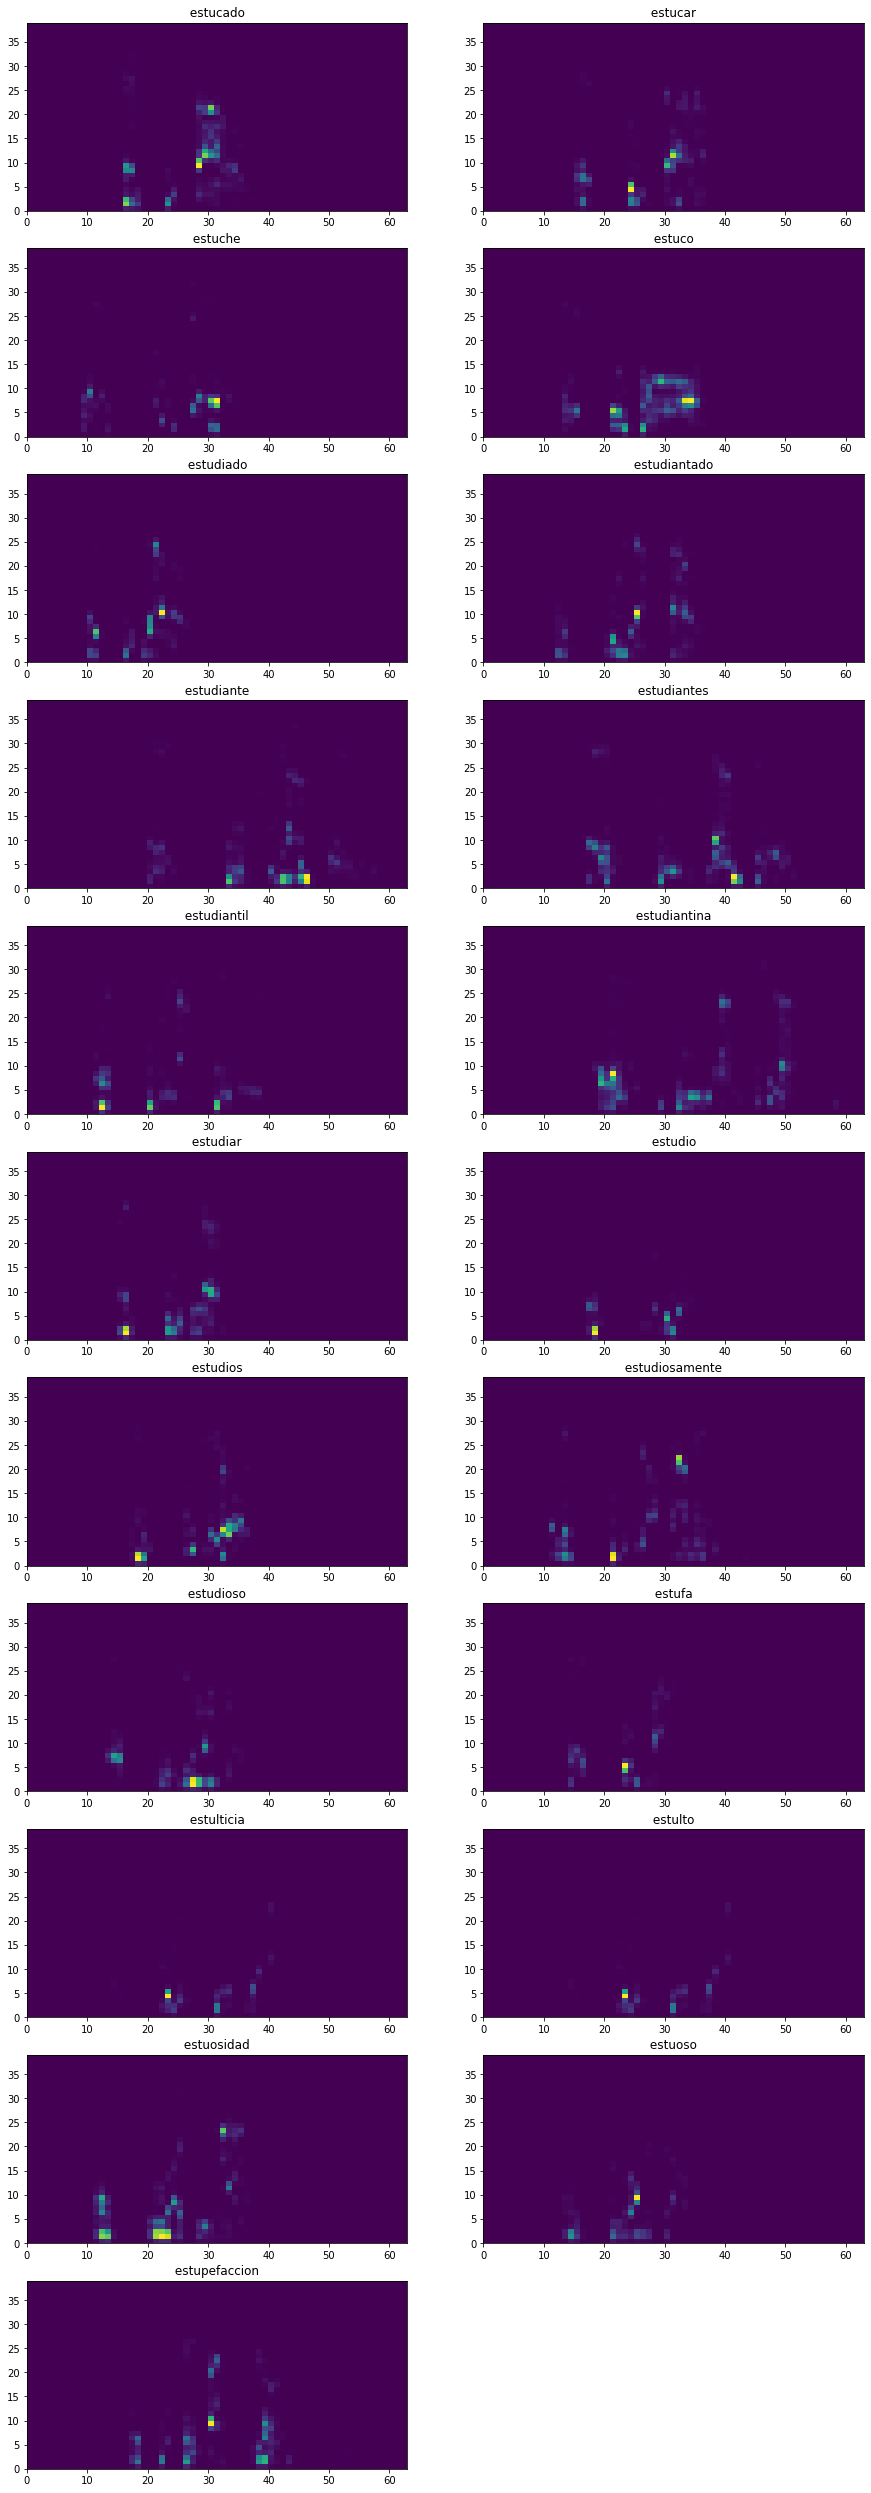

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(15,45))
#fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(lista_espectrogramas_mel)):
    # (4,5) = 4x5 = 20
    #                    row,column
    ax = fig.add_subplot(11,2, i+1)
    ax.pcolormesh(lista_espectrogramas_mel[i][0])
    ax.set_title(words[i])

# Revisando Fonemas

In [6]:
mel = lista_espectrogramas_mel[0][0]
d = np.sqrt(sum(np.power(mel[1:]-mel[0:-1],2)))
m = np.mean(d)

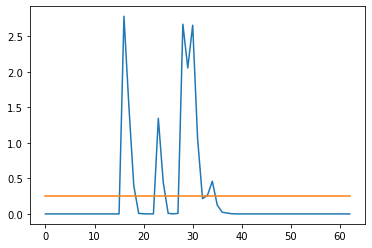

In [7]:
plt.plot(d)
plt.plot(m*np.ones(len(d)))

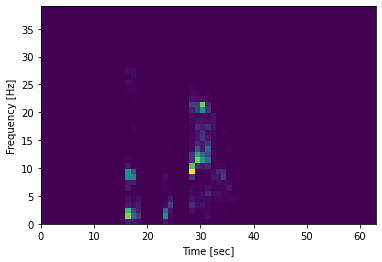

In [8]:
plt.pcolormesh(mel)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Funciones y diccionarios útiles

Luego nos sera util definir un diccionario que mapee para cada letra su respectivo fonema

In [9]:
letter2phonem = {
    'a':'a','b':'b','v':'b','w':'b','c':'k','z':'0',
    'ch':'ch','d':'d','e':'e','f':'f','g':'g','gu':'g',
    'h':'','i':'i','y':'i','g':'j','j':'j','ca':'k',
    'cc':'k','ci':'s','ce':'s','co':'k','cu':'k','qu':'k',
    'k':'k','l':'l','ll':'ll','m':'m','n':'n','ñ':'ñ',
    'o':'o','p':'p','r':'r','s':'s','t':'t','u':'u',
    'x':'gs','y':'y',' ':' '
}

Las siguientes funciones nos seran útiles para traducir una palabra a su representación fonética.

In [10]:
def getLetters(word,dic): 
    # Funcion recursiva
    # Word : Palabras
    # Dic : Diccionario de letras y fonemas
    special = [n for n in dic if len(n)>1] # Reconoce fonemas especiales como 'ch','co'.
    if(len(word)==1 or len(word)==0):
        return list(word) if word!='h' else [] # caso base solo un fonema
    else:
        i = next((word.index(n) for n in special if n in word),None) # busca caso especial en palabras
        if(i is None):
            return list(word) # si no hay caso especial retorna palabra
        else:
            return getLetters(word[0:i],dic)+[word[i:i+2]]+getLetters(word[i+1:],dic)# si tiene caso especial llama la funcion
        # con los letras de la izquierda mas el fonema especial mas los casos de la derecha del caso especial

def getPhonems(word,dic):
    '''
        Funcion que dada una palabra (word) y 
        un diccionario (dic) retorna una lista 
        con los fonemas que componen la palabra.
        
        INPUT:
            word: string
            dic: diccionario
        OUTPUT: lista de strings
    '''
    print('Palabra: ',getLetters(word,dic))
    return [dic[n] for n in getLetters(word,dic)] # convierte las letras fonemas con el diccionario ya planteado

# Obteniendo Fonemas

La siguiente función detectara automáticamente donde se produce el sonido de voz, seleccionara el rango que corresponde a la voz, lo dividirá en partes iguales correspodiente al número de fonema que posee cada palabra. Luego le dara a cada fonema su respectivo rango.

In [11]:
def getFonemas(mel,n_fonema):
    '''
        Funcion que dado un espectrograma de mel y
        una cantidad de fonemas retorna una lista, 
        de longitud n_fonemas, de vectores los cuales 
        representan los fonemas que componen a la palbra
        
        INPUT:
            mel: matriz de 39x63
            n_foenma: enetro
        OUTPUT: lista de vectores longitud n_fonema
    '''
    rou = lambda x,n : int(x/n) if x%n == 0 else int(x/n)+1 # Division palabra en partes iguales
    d = np.sqrt(sum(np.power(mel[1:]-mel[0:-1],2))) # Potencia cuadrada señales, para reconocer fonemas
    m = np.mean(d) # media d
    index = [i for i,n in enumerate(d) if n>m] # Obtiene indices de quienes superen la media, reconoce la voz
    delta = rou(index[-1]-index[0],n_fonema) # Obtiene el rango y divide el rango en el numero de fonemas de la palabra
    fonemas = []
    for f in range(n_fonema): # por cada fonema, se añade el respectivo rango del sonido que concuerda con la posicion de 
        # la palabra
        I_1 = index[0]+(delta*f)
        I_2 = index[0]+(delta*(f+1))+1
        fonemas.append(mel[:,I_1:I_2])
    return fonemas

In [12]:
# Por cada sonido aplica la funcion get fonemas con el respectivo numero de fonemas y el espectograma
fonemas = [getFonemas(melSpec,nFonem) for melSpec,nFonem in lista_espectrogramas_mel] 

In [13]:
print("Cantidad de palabras: ",len(fonemas))
print("Cantidad de fonemas primera palabra: ",len(fonemas[0]))
print("Dimensiones de la matriz que compone el primer fonema de la primera palabra: ",fonemas[0][0].shape)

Cantidad de palabras:  21
Cantidad de fonemas primera palabra:  10
Dimensiones de la matriz que compone el primer fonema de la primera palabra:  (39, 3)


In [14]:
# Encontrando fonemas
phonemsAndVectors = {
    'e':[],'s':[],'t':[],'u':[],'d':[],'i':[],'k':[],'a':[],'ch':[],
    'l':[],'o':[],'m':[],'n':[],'f':[],'r':[],'p':[],'':[], ' ':[]
}

El siguiente codigo nos será útil para poder determinar la posición de los fonemas en tdas la palabras, que nos sera util para determinar asi tambien los vectores que corresponde a cada fonema.

In [15]:
#(numbers of word,position)
secciones_fonemas_e =[]
secciones_fonemas_s =[]
secciones_fonemas_t =[]
secciones_fonemas_u =[]
secciones_fonemas_d =[]
secciones_fonemas_i =[]
secciones_fonemas_k =[]
secciones_fonemas_a =[]
secciones_fonemas_r =[]
secciones_fonemas_ch =[]
secciones_fonemas_l =[]
secciones_fonemas_o =[]
secciones_fonemas_m =[]
secciones_fonemas_n =[]
secciones_fonemas_f =[]
secciones_fonemas_p =[]
secciones_fonemas_ =[]
secciones_fonemas_v =[]

# Adding (word,position phoneme)
for i in range(len(words)):
    palabra_i = getPhonems(words[i],letter2phonem) # Remember we could change this
    print('Fonema: ',palabra_i)
    print(i,words[i])
    for pos_fo in range(len(palabra_i)):
        if palabra_i[pos_fo] == "e":
            secciones_fonemas_e.append((i,pos_fo))
        elif palabra_i[pos_fo] == "s":
             secciones_fonemas_s.append((i,pos_fo))
        elif palabra_i[pos_fo] == "t":
             secciones_fonemas_t.append((i,pos_fo))
        elif palabra_i[pos_fo] == "u":
             secciones_fonemas_u.append((i,pos_fo))
        elif palabra_i[pos_fo] == "d":
             secciones_fonemas_d.append((i,pos_fo))
        elif palabra_i[pos_fo] == "i":
             secciones_fonemas_i.append((i,pos_fo))
        elif palabra_i[pos_fo] == "k":
             secciones_fonemas_k.append((i,pos_fo))
        elif palabra_i[pos_fo] == "a":
             secciones_fonemas_a.append((i,pos_fo))
        elif palabra_i[pos_fo] == "r":
             secciones_fonemas_r.append((i,pos_fo))
        elif palabra_i[pos_fo] == "ch":
             secciones_fonemas_ch.append((i,pos_fo))
        elif palabra_i[pos_fo] == "l":
             secciones_fonemas_l.append((i,pos_fo))
        elif palabra_i[pos_fo] == "m":
             secciones_fonemas_m.append((i,pos_fo))
        elif palabra_i[pos_fo] == "n":
             secciones_fonemas_n.append((i,pos_fo))
        elif palabra_i[pos_fo] == "f":
             secciones_fonemas_f.append((i,pos_fo))
        elif palabra_i[pos_fo] == "p":
             secciones_fonemas_p.append((i,pos_fo))
        elif palabra_i[pos_fo] == "":
             secciones_fonemas_.append((i,pos_fo))
        elif palabra_i[pos_fo] == "o":
             secciones_fonemas_o.append((i,pos_fo))
        elif palabra_i[pos_fo] == " ":
             secciones_fonemas_v.append((i,pos_fo))

Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'd', 'o', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'k', 'a', 'd', 'o', ' ']
0  estucado 
Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'r', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'k', 'a', 'r', ' ']
1  estucar 
Palabra:  [' ', 'e', 's', 't', 'u', 'ch', 'h', 'e', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'ch', '', 'e', ' ']
2  estuche 
Palabra:  [' ', 'e', 's', 't', 'u', 'co', 'o', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'k', 'o', ' ']
3  estuco 
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'd', 'o', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'd', 'o', ' ']
4  estudiado 
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'a', 'd', 'o', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'a', 'd', 'o', ' ']
5  estudiantado 
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', ' ']
Fonema:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', ' ']
6  estudiante 
Palabra:  [' ', 'e', 's',

# Modelos Mixtos Gaussianos

In [16]:
from sklearn.mixture import GaussianMixture

Nuestra primera aproximación fue concatenar todos los vectores correspondientes a los mel espectogramas y ajustar el modelo gaussiano con esos datos en una matriz $M$

In [17]:
M = np.concatenate((sum([fonemas[i][:] for i in range(len(fonemas))],[])),axis=1)
M.shape

(39, 780)

In [18]:
M.shape

(39, 780)

In [19]:
# Ajuste del modelo con los 18 fonemas
gmm_model = GaussianMixture(n_components=18, covariance_type="spherical")
gmm_model.fit(M.T)

GaussianMixture(covariance_type='spherical', n_components=18)

In [20]:
means = gmm_model.means_
cov = gmm_model.covariances_

Al final no resulto con buenas predicciones, incluso para reconocer los estados de la cadena markov, si el profesor decide puede correr este algoritmo y luego la ultim celda que se encarga de generar las predicciones de las palabras y genera palabras muy aleatorias.

# Matrices de medias y varianzas

Finalmente optamos por obtener las medias y varianzas de cada fonema de manera individual

### Medias

In [21]:
# Fonema media 
f_m_E = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_e],axis=1),axis=1) #obtiene media fonema e
f_m_S = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_s],axis=1),axis=1)
f_m_T = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_t],axis=1),axis=1)
f_m_U = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_u],axis=1),axis=1)
f_m_D = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_d],axis=1),axis=1)
f_m_I = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_i],axis=1),axis=1)
f_m_K = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_k],axis=1),axis=1)
f_m_A = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_a],axis=1),axis=1)
f_m_CH = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_ch],axis=1),axis=1)
f_m_L = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_l],axis=1),axis=1)
f_m_O = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_o],axis=1),axis=1)
f_m_M = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_m],axis=1),axis=1)
f_m_N = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_n],axis=1),axis=1)
f_m_F = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_f],axis=1),axis=1)
f_m_R = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_r],axis=1),axis=1)
f_m_P = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_p],axis=1),axis=1)
f_m_ = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_],axis=1),axis=1)
f_m_V = np.mean(np.concatenate([fonemas[i][j] for i,j in secciones_fonemas_v],axis=1),axis=1)

Juntamos todas las medias en un vector de medias

In [22]:
# Matriz de medias
means = np.array([f_m_E,f_m_S,f_m_T,f_m_U,f_m_D,f_m_I,f_m_K,f_m_A,f_m_CH,f_m_L,f_m_O,f_m_M,f_m_N,f_m_F,f_m_R,f_m_P,f_m_,f_m_V])

### Covarianzas

In [23]:
def morePhonem(fonema):
    M = fonema.copy()
    c = fonema.shape[1]
    s = 39-c
    if s > 0:
        mean = np.mean(fonema,axis=1)
        cov = np.cov(fonema)
        vector = np.random.multivariate_normal(mean,cov)
        for k in range(s+10):
            M = np.concatenate([M,np.reshape(vector,(39,1))],axis=1)
        return M
    else:
        return fonema

In [24]:
# Matriz en la que se almacenan todas las matrices de covarianza
cov = np.zeros((18,39,39))

# Función que calcula la matriz de covarianza dados todos los vectores de un fonema
covPhonem = lambda x : np.cov(morePhonem(np.concatenate([fonemas[i][j] for i,j in x],axis=1)))

# Calculando Matrices de covarianza por fonema
cov_E = covPhonem(secciones_fonemas_e)
cov_S = covPhonem(secciones_fonemas_s)
cov_T = covPhonem(secciones_fonemas_t)
cov_U = covPhonem(secciones_fonemas_u)
cov_D = covPhonem(secciones_fonemas_d)
cov_I = covPhonem(secciones_fonemas_i)
cov_K = covPhonem(secciones_fonemas_k)+np.eye(39)*2
cov_A = covPhonem(secciones_fonemas_a)
cov_CH = covPhonem(secciones_fonemas_ch)+np.eye(39)*2
cov_L = covPhonem(secciones_fonemas_l)+np.eye(39)*2
cov_O = covPhonem(secciones_fonemas_o)
cov_M = covPhonem(secciones_fonemas_m)+np.eye(39)*2
cov_N = covPhonem(secciones_fonemas_n)+np.eye(39)*2
cov_F = covPhonem(secciones_fonemas_f)+np.eye(39)*2
cov_R = covPhonem(secciones_fonemas_r)+np.eye(39)*2
cov_P = covPhonem(secciones_fonemas_p)+np.eye(39)*2
cov_ = covPhonem(secciones_fonemas_)+np.eye(39)*2
cov_V = covPhonem(secciones_fonemas_v)

# Creando matriz de (18x39x39) de covarianzas
cov[0,:,:] = cov_E
cov[1,:,:] = cov_S
cov[2,:,:] = cov_T
cov[3,:,:] = cov_U
cov[4,:,:] = cov_D
cov[5,:,:] = cov_I
cov[6,:,:] = cov_K
cov[7,:,:] = cov_A
cov[8,:,:] = cov_CH
cov[9,:,:] = cov_L
cov[10,:,:] = cov_O
cov[11,:,:] = cov_M
cov[12,:,:] = cov_N
cov[13,:,:] = cov_F
cov[14,:,:] = cov_R
cov[15,:,:] = cov_P
cov[16,:,:] = cov_
cov[17,:,:] = cov_V

In [25]:
# Permite saber si una matriz es definida positiva
def is_pos_def(x): 
    return np.all(np.linalg.eigvals(x) > 0)

In [26]:
['La matriz '+str(i)+' es definida positiva?: '+str(is_pos_def(cov[i,:,:])) for i in range(18)]

['La matriz 0 es definida positiva?: True',
 'La matriz 1 es definida positiva?: True',
 'La matriz 2 es definida positiva?: True',
 'La matriz 3 es definida positiva?: True',
 'La matriz 4 es definida positiva?: True',
 'La matriz 5 es definida positiva?: True',
 'La matriz 6 es definida positiva?: True',
 'La matriz 7 es definida positiva?: True',
 'La matriz 8 es definida positiva?: True',
 'La matriz 9 es definida positiva?: True',
 'La matriz 10 es definida positiva?: True',
 'La matriz 11 es definida positiva?: True',
 'La matriz 12 es definida positiva?: True',
 'La matriz 13 es definida positiva?: True',
 'La matriz 14 es definida positiva?: True',
 'La matriz 15 es definida positiva?: True',
 'La matriz 16 es definida positiva?: True',
 'La matriz 17 es definida positiva?: True']

# Matriz de Transiciones

Ahora calcularemos las probabilidades de transición

In [27]:
transitions = np.zeros((18,18)) # Creamos matriz 18 x 18
np.fill_diagonal(transitions,5) # Añadimos 5 en las diagonales nos permitiran añadir probabilidad que despues 
                                # de un fonema se repita el mismo fonema
# Definimos un diccionario de phonema,posicion fonema en matriz
phonem2index = {
    'e':0,'s':1,'t':2,'u':3,'d':4,'i':5,'k':6,'a':7,'ch':8,
    'l':9,'o':10,'m':11,'n':12,'f':13,'r':14,'p':15,'':16,' ':17
}

In [28]:
transitions

array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0

Ahora calculamos la probabilidad de transición de cada fonema, esta se encarga de ver el fonema, luego el fonema que le sigue y contar cuantas veces sucede. Esto es supongamos que despues de e, sigue la s 4 veces, en la matriz en la posicion (0,1) de la matriz se guarda el conteo.

In [29]:
for word in words:
    phonems = getPhonems(word,letter2phonem)# obtiene representaion fonematica de palabra
    print('Fonemas: ',phonems,'\n')
    for i,phonem in enumerate(phonems[0:-1]):# por cada fonema
        x = phonem2index[phonem] #fonema analizar
        y = phonem2index[phonems[i+1]] # fonema que le sigue
        transitions[x,y]+=1 #suma conteo en matriz en la posición correspondiente

Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'd', 'o', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'k', 'a', 'd', 'o', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'r', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'k', 'a', 'r', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'ch', 'h', 'e', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'ch', '', 'e', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'co', 'o', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'k', 'o', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'd', 'o', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'd', 'o', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'a', 'd', 'o', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'a', 'd', 'o', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', ' ']
Fonemas:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', ' '] 

Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', 's', ' ']
Fonemas:  [' ', 'e', '

Luego normalizamos los conteos a probabilidades

In [30]:
probTransitions = np.nan_to_num(transitions/transitions.sum(axis=1)[:,None])

In [31]:
probTransitions

array([[0.15625   , 0.6875    , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03125   , 0.03125   , 0.        ,
        0.        , 0.        , 0.09375   ],
       [0.        , 0.14705882, 0.61764706, 0.        , 0.        ,
        0.08823529, 0.        , 0.02941176, 0.        , 0.        ,
        0.05882353, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05882353],
       [0.08823529, 0.        , 0.14705882, 0.61764706, 0.        ,
        0.08823529, 0.        , 0.02941176, 0.        , 0.        ,
        0.02941176, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.19230769, 0.42307692,
        0.        , 0.11538462, 0.        , 0.03846154, 0.07692308,
        0.07692308, 0.        , 0.        , 0.03846154, 0.        ,
        0.03846154, 0.        , 0.        ],
    

In [32]:
probTransitions.shape

(18, 18)

In [33]:
probTransitions

array([[0.15625   , 0.6875    , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03125   , 0.03125   , 0.        ,
        0.        , 0.        , 0.09375   ],
       [0.        , 0.14705882, 0.61764706, 0.        , 0.        ,
        0.08823529, 0.        , 0.02941176, 0.        , 0.        ,
        0.05882353, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05882353],
       [0.08823529, 0.        , 0.14705882, 0.61764706, 0.        ,
        0.08823529, 0.        , 0.02941176, 0.        , 0.        ,
        0.02941176, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.19230769, 0.42307692,
        0.        , 0.11538462, 0.        , 0.03846154, 0.07692308,
        0.07692308, 0.        , 0.        , 0.03846154, 0.        ,
        0.03846154, 0.        , 0.        ],
    

Verificamos que cumplan la propiedad que la suma de probabilidades de 1

In [34]:
probTransitions.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

# Probabilidades Pi

Ahora calcularemos las probabilidades sin dependencia a priori o tambien conocidas como probabilidades iniciales. Para esto vemos cuantas veces se repiten los fonemas en cada palabra.

Inicializamos cada conteo en 0 de cada fonema

In [35]:
phonemsPI = {
    'e':0,'s':0,'t':0,'u':0,'d':0,'i':0,'k':0,'a':0,'ch':0,'l':0,
    'o':0,'m':0,'n':0,'f':0,'r':0,'p':0,'':0,' ':0
}

Luego realizamos el correspondiente conteo

In [36]:
for word in words:
    phonems = getPhonems(word,letter2phonem) #representacion fonetica de palabra
    for phonem in phonems:
        phonemsPI[phonem]+=1 # añade conteo cada vez que se encuentra el fonema

Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'd', 'o', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'ca', 'a', 'r', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'ch', 'h', 'e', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'co', 'o', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'd', 'o', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'a', 'd', 'o', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'e', 's', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'i', 'l', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'n', 't', 'i', 'n', 'a', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'a', 'r', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'o', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'o', 's', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'o', 's', 'a', 'm', 'e', 'n', 't', 'e', ' ']
Palabra:  [' ', 'e', 's', 't', 'u', 'd', 'i', 'o', '

In [37]:
PI = phonemsPI.copy()
totalLetters = sum(PI.values()) # sumamos el numero de veces que aparecen todos los fonemas
for key in PI.keys():
    PI[key] = PI[key]/totalLetters  # lo convertimos a probabilidad

In [38]:
phonemsPI

{'e': 27,
 's': 29,
 't': 29,
 'u': 21,
 'd': 16,
 'i': 17,
 'k': 4,
 'a': 16,
 'ch': 1,
 'l': 3,
 'o': 14,
 'm': 1,
 'n': 8,
 'f': 2,
 'r': 2,
 'p': 1,
 '': 1,
 ' ': 42}

Mostramos las probabilidades iniciales de cada fonema, notemas que la mayo prbabilidad recae en silencio.

In [39]:
PI

{'e': 0.11538461538461539,
 's': 0.12393162393162394,
 't': 0.12393162393162394,
 'u': 0.08974358974358974,
 'd': 0.06837606837606838,
 'i': 0.07264957264957266,
 'k': 0.017094017094017096,
 'a': 0.06837606837606838,
 'ch': 0.004273504273504274,
 'l': 0.01282051282051282,
 'o': 0.05982905982905983,
 'm': 0.004273504273504274,
 'n': 0.03418803418803419,
 'f': 0.008547008547008548,
 'r': 0.008547008547008548,
 'p': 0.004273504273504274,
 '': 0.004273504273504274,
 ' ': 0.1794871794871795}

# HMM

Ahora procederemos finalmente a ajustar nuestro modelo Gaussianiano mixto

In [40]:
from hmmlearn.hmm import GaussianHMM

In [41]:
HMMmodel = GaussianHMM(n_components=18,covariance_type="full") # 18 componentes por que tenemos 18 fonemas
HMMmodel.startprob_ = list(PI.values()) # Vector de probabilidades iniciales
HMMmodel.transmat_ = probTransitions    # Matriz de transicion
HMMmodel.means_ = means                 # Matriz de medias
HMMmodel.covars_ = cov                  # Matriz de covarianzas

In [42]:
# Diccionario para traducir indices a fonemas
index2phonem = {
    0:'e',1:'s',2:'t',3:'u',4:'d',5:'i',6:'k',7:'a',8:'ch',
    9:'l',10:'o',11:'m',12:'n',13:'f',14:'r',15:'p',16:'',17:' '
}

Verificamos que las predicciones se ajusten un poco a las palabras reales, es notable que no será perfecto pues, tenemos muy pocos datos (Voces). Sin embargo como elegimos palabras muy parecidas predicen muy bien la 'estructura' de la mayoría de palabras.

In [43]:
# Prediciendo las palabras
for i,palabra in enumerate(words):
    R = np.concatenate(fonemas[i],axis=1)
    predtictWord = HMMmodel.predict(R.T)
    print("Palabra:",palabra,"--->",reduce(lambda x,y : x+y, [index2phonem[l] for l in predtictWord]))

Palabra:  estucado  --->   eeeeesttttttttaaaadddooooost
Palabra:  estucar  --->    eestttttttttttttuukkaaaaaa estttt
Palabra:  estuche  --->    eeesttttttttttuuuudill  eeeeeeees
Palabra:  estuco  --->   eeesttossttttttuuuuuuooooo est
Palabra:  estudiado  --->   eesttttttuuudddddiaaaddostttttt
Palabra:  estudiantado  --->   eeestttttuuudddddiaaadddostttadddoostttt
Palabra:  estudiante  --->    eeesttttttttttuudddddddiaaaaaanntttttteeeeest
Palabra:  estudiantes  --->    eeeessstttttttuuuuudddiiaaaaaa esttteeeeeestttttt
Palabra:  estudiantil  --->    eestttosttttttuuddddostiaaa ee    esttttttttttttt
Palabra:  estudiantina  --->    eeeessstttttttuuuuddddiiaaddosonttttttiiiistttttttttt
Palabra:  estudiar  --->   eeessstttttuuudddiaaaaadostt
Palabra:  estudio  --->   eesttttttttuuudddiooooo  
Palabra:  estudios  --->   eesttttttttudddddiooooosss e
Palabra:  estudiosamente  --->   eeessttttttudddddiooooossssaameeeeentttttttto 
Palabra:  estudioso  --->   eeessssstttuuudddiooooosooooo  
Palabr

## Predicción Nuevas Palabras

Para realizar unas últimas pruebas se realizaron 10 nuevas grabaciones y se utilizó el modelo para predecir sus fonemas

In [44]:
dia, fs = sf.read('Audios/dia.wav', dtype='float32')
tu, fs = sf.read('Audios/tu.wav', dtype='float32')
antes, fs = sf.read('Audios/antes.wav', dtype='float32')
carro, fs = sf.read('Audios/carro.wav', dtype='float32')
dado, fs = sf.read('Audios/dado.wav', dtype='float32')
mente, fs = sf.read('Audios/mente.wav', dtype='float32')
tina, fs = sf.read('Audios/tina.wav', dtype='float32')
si, fs = sf.read('Audios/si.wav', dtype='float32')
carroceria, fs = sf.read('Audios/carroceria.wav', dtype='float32')
faccion, fs = sf.read('Audios/faccion.wav', dtype='float32')


In [45]:
# la lista nos sera util para no repetir funciones
lista_sonidosp =[(dia,5),(tu,4),(antes,7),(carro,7),(dado,5),(mente,7),(tina,6),(si,4),(carroceria,12),(faccion,8)]

In [46]:
wordsp = ['dia','tu','antes','carro','dado','mente','tina','si','carroceria','faccion']
wordsp = [' '+n+' ' for n in wordsp]

In [47]:
# Creando la matriz del espectrograma
n_window = int(0.02*fs)
len_over = int(0.01*fs) # Number overlap between samples
nfft = 512              # Number Points FFT
n_mels = 39
lista_espectrogramas_melp =[]
for sonido in lista_sonidosp: # Iteramos por cada sonido
    mel = librosa.feature.melspectrogram(sonido[0],sr=fs,n_fft=512,win_length=n_window,window='hann',n_mels=n_mels) # obteniendo coeficientes mel
    lista_espectrogramas_melp.append((mel,sonido[1]))

In [48]:
fonemasp = [getFonemas(melSpec,nFonem) for melSpec,nFonem in lista_espectrogramas_melp] 

In [49]:
# Prediciendo las palabras
for i,palabra in enumerate(wordsp):
    R = np.concatenate(fonemasp[i],axis=1)
    predtictWord = HMMmodel.predict(R.T)
    print("Palabra:",palabra,"--->",reduce(lambda x,y : x+y, [index2phonem[l] for l in predtictWord]))

Palabra:  dia  ---> fffffffffffffff
Palabra:  tu  ---> uuuuuuuuuuuuuudd
Palabra:  antes  ---> rrrrr   eesto       e
Palabra:  carro  ---> rrrrrrrr             
Palabra:  dado  ---> pppppppppee         
Palabra:  mente  ---> nnnn      esttto   e 
Palabra:  tina  ---> llllltulllllll   e
Palabra:  si  ---> lllll     es
Palabra:  carroceria  ---> rrrrrrrrrrrrr   eee            efffa
Palabra:  faccion  ---> rrrrrrrrrrr  es  e esinnnnn    e


Se puede observar que claramente los resultados son malos, esto se puede deber a que las pruebas anteriores se realziaron con las mismas palabras de entrenamiento y, además, las nuevas palabras no contienen los patrones de estu- que si están en todas las de entrenamiento.

Este modelo funciona muy bien con las palabras de entrenamiento, en comparación con la red neuronal que se implementó. 